In [28]:
from tensorflow import keras

In [29]:
mnist = keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

OutPut: 9


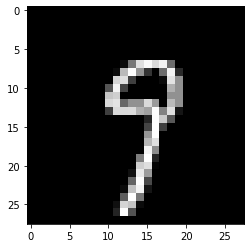

In [30]:
import matplotlib.pyplot as plt
a = 1500
plt.imshow(x_train[a],cmap = 'gray')
print(f"OutPut: {y_train[a]}")

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_train[0].max()

255

In [33]:
x_test[0].max()

255

In [34]:
# Normalizing the image

x_train = x_train/255
x_test = x_test/255

In [35]:
#defining the model

model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape = x_train[0].shape))           #784 neurons
model.add(keras.layers.Dense(1400,activation ='relu'))                                          
model.add(keras.layers.Dense(10,activation = 'softmax'))                  #10 neurons

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1400)              1099000   
                                                                 
 dense_3 (Dense)             (None, 10)                14010     
                                                                 
Total params: 1,113,010
Trainable params: 1,113,010
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [38]:
model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1787 - accuracy: 0.9463
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0720 - accuracy: 0.9773
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9836
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9958
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.013

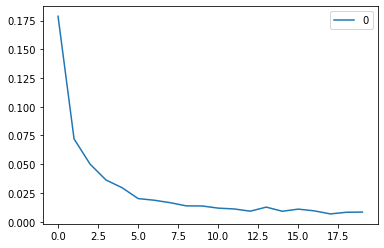

In [39]:
import pandas as pd

loss = pd.DataFrame(model.history.history['loss']).plot()

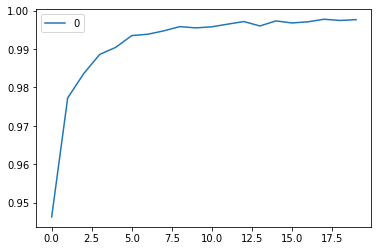

In [40]:
acc  = pd.DataFrame(model.history.history['accuracy']).plot()

Evaluating Test Cases


In [41]:
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9813

In [44]:
model.save('mnist.hdf5')